In [1]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets import make_blobs

In [2]:
# Create samples for clustering

n_samples = 1500 # --> sample size
random_state = 42 # --> seed for the random number generation used in cluster centroid initialization
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3) # --> generate data to be clustered

In [3]:
def plot_clustering(X, y, y_pred, title1='Raw data', title2="Original values", title3="K-means clustering result"):
  plt.figure(figsize=(15, 5))
  plt.subplot(131)
  plt.scatter(X[:, 0], X[:, 1]) # -->  raw data scatter plot
  plt.title(title1)

  plt.subplot(132)
  plt.scatter(X[:, 0], X[:, 1], c=y) # -->  scatter plot with coloring based on the original labels
  plt.title(title2)

  plt.subplot(133)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred) # --> coloring based on the kmeans prediction
  plt.title(title3)

  plt.show()

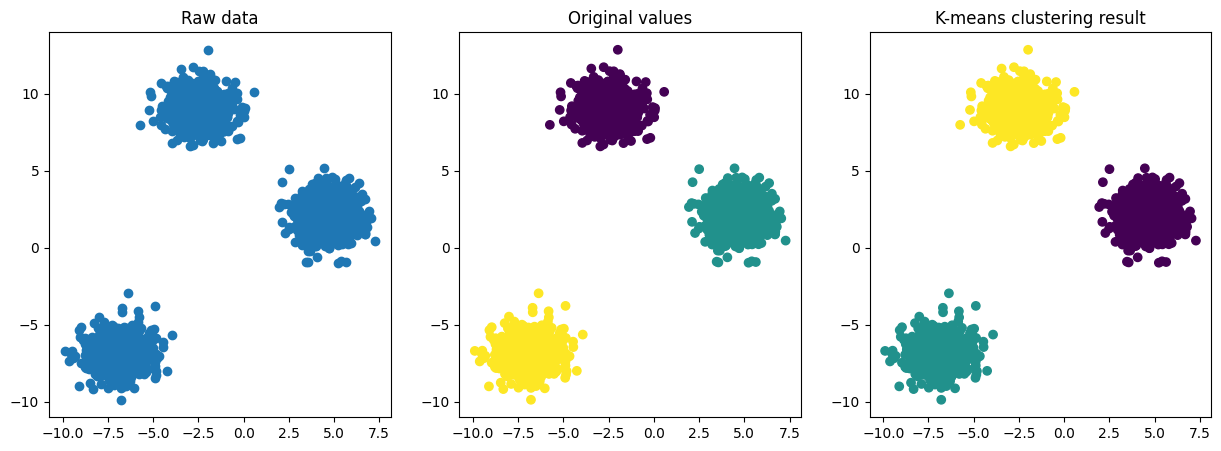

In [4]:
model = KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit(X) # --> create clustering model as object
y_pred = model.predict(X)

plot_clustering(X, y, y_pred)

In [5]:
# Data generation for the data size problem

n_samples = 2000000
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

In [ ]:
# Showing the difficulties of Kmeans with large sample size

start = time.time()

model = KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit(X)
y_pred = model.predict(X)

end = time.time()
print(end - start)

plot_clustering(X, y, y_pred)

In [ ]:
# MiniBatchKMeans for easing the pressure of large sample size


start = time.time()

model = MiniBatchKMeans(n_clusters=3, random_state=random_state).fit(X)
y_pred = model.predict(X)

end = time.time()
print(end - start)

plot_clustering(X, y, y_pred)

In [ ]:
# Showing the sensitivity of Kmeans to the number of clusters

n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

model = KMeans(n_clusters=2, random_state=random_state, n_init='auto').fit(X)
y_pred = model.predict(X)

plot_clustering(X, y, y_pred, title3 = "Incorrect Number of Clusters - 2")

model = KMeans(n_clusters=4, random_state=random_state, n_init='auto').fit(X)
y_pred = model.predict(X)

plot_clustering(X, y, y_pred, title3 = "Incorrect Number of Clusters - 4")

In [ ]:
# Showing the sensitivity of Kmeans for anisotropic data

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)
transformation = [[0.5, 0.5], [-0.4, -0.8]]
X_aniso = np.dot(X, transformation)

model = KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit(X_aniso)
y_pred = model.predict(X_aniso)

plot_clustering(X_aniso, y, y_pred, title1='Anisotropic data')

In [ ]:
# Difficulties of Kmeans for variance in variances

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 3.5, 0.5], random_state=random_state, centers=3)

model = KMeans(n_clusters=3, random_state=random_state, n_init='auto').fit(X)
y_pred = model.predict(X)

plot_clustering(X, y, y_pred, title1="Unequal Variance")